
# Project: Investigate a Dataset (tmdb-movies)
 

 
 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a> 
## Introduction  



I want investigate in how rolling of type of movies is produced , and the relationship between year and profit and relationship between year and average_rate 

Question 1  what the more type is produced ?
 Question 2 what the relationship between profit and average_rate over years ?

In [1]:

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

=### General Properties

In this section i hold the data and ensure the data has ```null``` value or not and check about the data has correct data type to I can control it 

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_movie=pd.read_csv('tmdb-movies.csv')


In [3]:
df_movie.info()#to I know what null value and the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df_movie['release_date']=pd.to_datetime(df_movie['release_date']) #convert the release date from object to date time

In [5]:
df_movie.describe()#to I know the mean of all columns

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
df_movie[df_movie['keywords'].isnull()==True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
130,245706,tt2273657,1.284541,0,4719695,True Story,Jonah Hill|James Franco|Felicity Jones|Maria D...,NaN,Rupert Goold,Some mysteries are beyond belief.,...,A drama centered around the relationship betwe...,100,Crime|Drama|Mystery,Plan B Entertainment|Regency Enterprises|New R...,2015-04-17,354,6.0,2015,0.000000e+00,4.342117e+06
149,346808,tt3181776,1.041922,20000000,0,Momentum,Olga Kurylenko|Morgan Freeman|James Purefoy|Je...,NaN,Stephen S. Campanelli,NaN,...,"When Alex, an infiltration expert with a secre...",96,Thriller|Action,Thaba Media|Azari Media,2015-08-01,100,5.8,2015,1.839999e+07,0.000000e+00
154,314405,tt3278330,1.008474,12000000,0,Il racconto dei racconti,Salma Hayek|Vincent Cassel|John C. Reilly|Toby...,NaN,Matteo Garrone,Desire. Envy. Obsession.,...,"A fantasy film with horror elements, ""The Tale...",125,Romance|Fantasy|Horror,HanWay Films|Rai Cinema|Le Pacte|Fonds Eurimag...,2015-05-14,211,5.7,2015,1.104000e+07,0.000000e+00
155,282984,tt3715320,1.007054,11000000,27391084,Irrational Man,Emma Stone|Joaquin Phoenix|Jamie Blackley|Park...,http://www.sonyclassics.com/irrationalman/,Woody Allen,NaN,...,"On a small town college campus, a philosophy p...",95,Mystery|Drama,Sony Pictures|Gravier Productions,2015-07-17,319,6.1,2015,1.012000e+07,2.519979e+07
160,304372,tt3862750,0.950793,12000000,60273173,The Perfect Guy,Michael Ealy|Sanaa Lathan|Morris Chestnut|Kath...,http://www.sonypictures.com/movies/theperfectguy/,David M. Rosenthal,"Trust one, fear the other.",...,Leah Vaughn appears to have the ideal life. Sh...,100,Drama|Thriller,Screen Gems,2015-09-11,122,5.6,2015,1.104000e+07,5.545129e+07
164,228968,tt2917388,0.917040,0,0,Kidnapping Mr. Heineken,Anthony Hopkins|Jim Sturgess|Sam Worthington|R...,http://kidnappingmrheinekenmovie.com/,Daniel Alfredson,It was the perfect crime until they got away w...,...,The true story of the kidnapping of Freddy Hei...,95,Drama|Action|Crime|Thriller,Umedia|Informant Europe SPRL|European Film Com...,2015-03-12,131,5.8,2015,0.000000e+00,0.000000e+00
178,249688,tt3416744,0.836941,0,3002884,The End of the Tour,Jason Segel|Jesse Eisenberg|Anna Chlumsky|Mami...,http://a24films.com/films/the-end-of-the-tour/,James Ponsoldt,Imagine the greatest conversation you've ever ...,...,The story of the five-day interview between Ro...,106,Drama,A24,2015-07-31,126,7.3,2015,0.000000e+00,2.762652e+06
180,256962,tt1810683,0.829111,20000000,6420319,Little Boy,Jakob Salvati|Emily Watson|Cary-Hiroyuki Tagaw...,http://www.littleboymovie.com/,Alejandro Monteverde,Believe the impossible.,...,An eight-year-old boy is willing to do whateve...,106,Comedy|Drama|War,Metanoia Films,2015-04-23,113,7.1,2015,1.839999e+07,5.906691e+06
182,302528,tt3704050,0.820691,0,1986615,Remember,Christopher Plummer|Martin Landau|Dean Norris|...,http://www.rememberthemovie.com/,Atom Egoyan,Dark truths will come to light.,...,With the aid of a fellow Auschwitz survivor an...,94,Drama|Thriller,Serendipity Point Films|Egoli Tossell Film AG,2015-10-23,75,7.7,2015,0.000000e+00,1.827685e+06
189,328901,tt3165630,0.781809,0,0,The Benefactor,Dakota Fanning|Theo James|Richard Gere|Clarke ...,NaN,Andrew Renzi,His help comes at a price.,...,A newly married couple are forced to navigate ...,90,Drama,KSM,2015-04-17,55,4.5,2015,0.000000e+00,0.000000e+00



### Data Cleaning (missing value and duplicates)



in this section:
values 
1- drop the missing value which is effect the data 
2- drop the duplicates data 
3- replace zero value to average of each columns which is effect the data


type of movie :
1- I split all types 
2- sum them of each year 
3- rolling of each type by ten year 

profit:

1- I subtract the budget from revenu to take the profit


In [8]:
df_movie.duplicated().sum()

1

In [9]:
df_movie.drop_duplicates(inplace=True)#delet the duplicates

In [10]:
df_movie.drop(columns='production_companies',inplace=True)

In [11]:
df_movie.drop(columns='homepage',inplace=True)

In [12]:
df_movie[df_movie['imdb_id'].isnull()==True].index

Int64Index([548, 997, 1528, 1750, 2401, 4797, 4872, 6071, 7527, 7809], dtype='int64')

In [13]:
df_movie.drop(index=df_movie[df_movie['imdb_id'].isnull()==True].index ,inplace=True)#drop the null value in imdb_id

In [14]:
df_movie[df_movie['imdb_id'].isnull()==True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [15]:
df_movie['budget'].replace(0,1.467864e+07, inplace=True)#convert all zero in budget to the mean of budget 

In [16]:
df_movie['revenue'].replace(0,1.082400e+04,inplace=True)#convert all zero in revenue to the mean of revenue 

In [17]:
genres_df = pd.Series(df_movie['genres']).str.get_dummies(sep='|') # separation of types
genres_df.tail()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
10861,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10862,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10863,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10864,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10865,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [18]:
newdf_movie = pd.merge(df_movie, genres_df, right_index=True, left_index=True) # merge the types to data set
newdf_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,0,0,0,0,0,1,0,1,0,0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,...,0,0,0,0,0,1,0,1,0,0
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,...,0,0,0,0,0,1,0,1,0,0
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,...,0,0,0,0,0,1,0,0,0,0
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,...,0,0,0,0,0,0,0,1,0,0


In [19]:

typesofmovie=newdf_movie.groupby('release_year').sum().iloc[:,10:40] #sum each type by years 


In [20]:
typesofmovie.head()

,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,
1960,5,0,8,2,0,13,3,2,1,5,7,1,0,6,3,0,6,2,6
1961,6,1,10,2,0,16,5,2,1,3,3,2,1,7,4,0,0,2,3
1962,7,0,5,3,0,21,2,1,1,4,5,1,4,5,2,0,7,3,3
1963,7,1,13,4,0,13,3,2,2,4,9,0,6,8,2,0,10,1,2
1964,5,2,16,10,0,20,4,4,1,3,6,5,4,9,4,0,9,3,1


In [21]:
typesofmovie=typesofmovie.rolling(window=10).mean() # rolling 10 years for each types

typesofmovie

,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
typesofmovie.head(10)

,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# I take the values every 10 years 
movietenyear=typesofmovie.iloc[9:10]
movietenyear

,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,
1969,6.4,1.6,11.3,4.3,0.2,16.8,3.9,2.3,0.9,3.1,4.7,2.1,3.2,6.7,3.4,0.2,6.4,3.1,3.6


In [24]:

s=20
for i in range(5):
    movietenyear=movietenyear.append(typesofmovie.iloc[s-1:s])
    s+=10



In [25]:

df_movie['profit']= df_movie['revenue']- df_movie['budget']
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


<a id='eda'></a>
## Exploratory Data Analysis

now the data is ready the exploratoty 


### Research Question 1  what the more type is produced ? ?

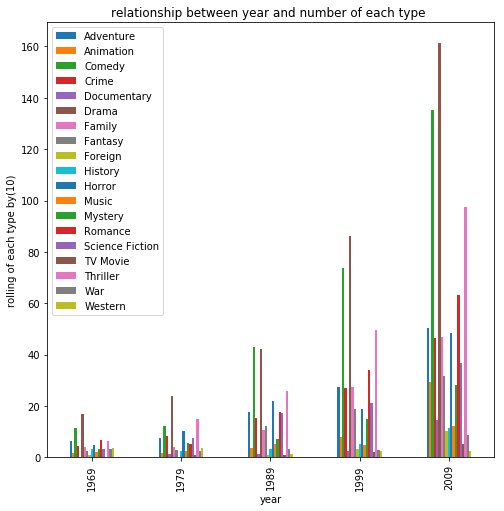

In [26]:

relationship=movietenyear.plot(kind='bar',title='relationship between year and number of each type ',figsize=(8,8));
relationship.set_xlabel('year');
relationship.set_ylabel('rolling of each type by(10)');


Question1 : Based on the Plot more type of movie is produced is Drama and comedy 

In [27]:
movietenyear.head()

,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,
1969,6.4,1.6,11.3,4.3,0.2,16.8,3.9,2.3,0.9,3.1,4.7,2.1,3.2,6.7,3.4,0.2,6.4,3.1,3.6
1979,7.7,1.7,12.2,8.3,1.3,23.9,3.9,3.0,0.3,2.3,10.4,2.5,5.6,5.1,7.7,0.8,14.8,2.5,3.6
1989,17.5,3.8,42.8,15.3,1.3,42.3,10.5,12.3,0.8,3.3,22.1,5.2,7.2,17.5,17.2,0.9,26.0,3.2,1.4
1999,27.5,7.9,73.7,27.0,2.3,86.2,27.3,18.8,3.2,5.3,18.9,4.9,14.8,34.1,21.1,1.9,49.5,2.9,2.5
2009,50.4,29.4,135.4,46.6,14.4,161.3,47.0,31.7,10.3,11.5,48.4,12.1,28.3,63.3,36.8,5.3,97.5,8.8,2.6


### Research what the relationship between profit and average_rate over years ? ?

In [28]:

mean=df_movie.groupby('release_year').mean()


profit=pd.DataFrame(list(mean['profit']))#take mean profit of each years
vote=pd.DataFrame(list(mean['vote_average']))#take mean profit of each years
mean.head()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj,profit
release_year,,,,,,,,,,
1960,15715.281250,0.458932,1.123955e+07,4.539862e+06,110.656250,77.531250,6.325000,5.082036e+06,3.340991e+07,-6.699690e+06
1961,18657.000000,0.422827,1.001137e+07,1.090153e+07,119.419355,77.580645,6.374194,1.085687e+07,7.947167e+07,8.901604e+05
1962,17001.062500,0.454783,9.966801e+06,6.744650e+06,124.343750,74.750000,6.343750,1.232693e+07,4.856238e+07,-3.222152e+06
1963,16556.000000,0.502706,1.208648e+07,5.520507e+06,111.323529,82.823529,6.329412,1.535687e+07,3.924580e+07,-6.565970e+06
1964,17379.571429,0.412428,1.177431e+07,8.127376e+06,109.214286,74.690476,6.211905,6.608980e+06,5.707603e+07,-3.646933e+06


In [29]:
profit.head()

,0
0,-6.699690e+06
1,8.901604e+05
2,-3.222152e+06
3,-6.565970e+06
4,-3.646933e+06


In [30]:
#put year as data frame
profit_edit=[]
for i in range(1960,2015,1):
    profit_edit.append(i)
profit_edit=pd.DataFrame(profit_edit)    


In [31]:
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


In [32]:
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


In [33]:
profit_edit['profit']= profit[0] 
profit_edit['vote_average']=vote[0]
profit_edit.rename(columns={0:'year'},inplace=True)
profit_edit.head()


,year,profit,vote_average
0,1960,-6.699690e+06,6.325000
1,1961,8.901604e+05,6.374194
2,1962,-3.222152e+06,6.343750
3,1963,-6.565970e+06,6.329412
4,1964,-3.646933e+06,6.211905


In [34]:
def Line_Plot(df, x, y, title,col1,col2):
    plt.ylabel(y)
    plt.xlabel(x)
    plt.title(title)
    plt.plot(df[col1],df[col2]);

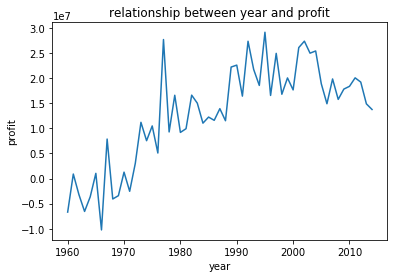

In [35]:

Line_Plot(profit_edit,'year','profit','relationship between year and profit','year','profit')

the profit is increas over years 

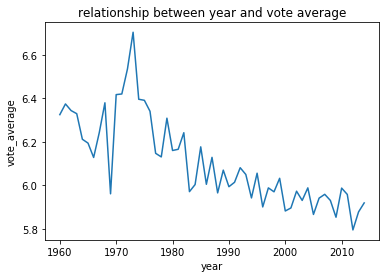

In [36]:

Line_Plot(profit_edit,'year','vote_average','relationship between year and vote average','year','vote_average')

the vote average is decreas over years

<a id='conclusions'></a>
## Conclusions
Question1 : Based on the Plot , the production companies moving towards production to two type of movie is  Drama and comedy 

Question2 : the movie which achieved high profit get low vote comparative others movie and the movie which achieved low profit get high vote comparative orhers movie




## limitations 

1-The produced movie in 1960s is low then other years 
2- key word of movie has to match null value that means i can't determain which movie appropriate to childs or not 